# Python Review: NumPy and PIL

Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Task 1

Opening an image

In [2]:
img = Image.open('../lena.png')

Accessing image description

In [3]:
img.format, img.size, img.mode

('PNG', (512, 512), 'RGB')

Displaying image in pillow

In [4]:
img.show()

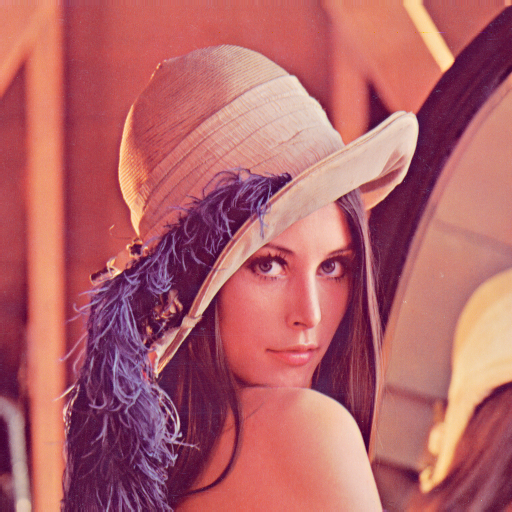

In [5]:
img

Displaying image using matplotlib as a graph

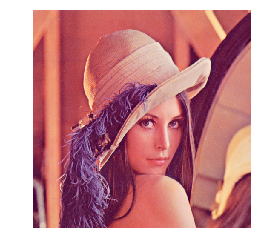

In [6]:
plt.axis('off')
plt.imshow(np.asarray(img))
plt.show()

Saving image as JPEG

In [7]:
try:
    img.save('new_lena.jpeg', 'JPEG')
except:
    print("Unable to convert iamge")

Checking if saved as intended

In [8]:
img_new = Image.open('new_lena.jpeg')
img_new.format, img_new.size, img_new.mode

('JPEG', (512, 512), 'RGB')

## Task 2

### Simple Example

Temperatures in Celcius as a list as well as npdarray

In [9]:
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]
C = np.array(cvalues)
C, type(C)

(array([20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]),
 numpy.ndarray)

Temperatures in Fahrenheit

In [10]:
C * 9 / 5 + 32

array([68.18, 69.44, 71.42, 72.5 , 72.86, 72.14, 71.24, 70.16, 69.62,
       68.18])

### Graphical Representation

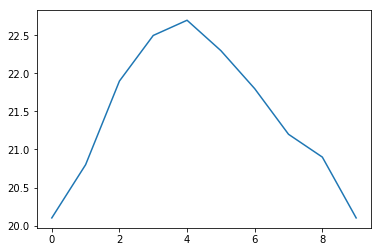

In [11]:
plt.plot(C)

### Memory Consumption

#### List

In [12]:
from sys import getsizeof as size

lst = [24, 12, 57]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57
total_list_size = size_of_list_object + size_of_elements

print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

Size without the size of the elements:  88
Size of all the elements:  84
Total size of list, including elements:  172


In [13]:
lst = [24, 12, 57, 42]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57, 42
total_list_size = size_of_list_object + size_of_elements

print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)
 
lst = []
print("Emtpy list size: ", size(lst))

Size without the size of the elements:  96
Size of all the elements:  112
Total size of list, including elements:  208
Emtpy list size:  64


#### Numpy Array

In [14]:
a = np.array([24, 12, 57])
size(a)

120

In [15]:
e = np.array([])
size(e)

96

### Time Comparison

In [16]:
import time

size_of_vec = 1000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1


def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1

In [17]:
t1 = pure_python_version()
t2 = numpy_version()

print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

0.0001723766326904297 6.365776062011719e-05
Numpy is in this example 2.707865168539326 faster!


In [18]:
from timeit import Timer

size_of_vec = 1000

X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)

def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]
    
def numpy_version():
    Z = X + Y
    
    
#timer_obj = Timer("x = x + 1", "x = 0")
timer_obj1 = Timer("pure_python_version()", 
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", 
                   "from __main__ import numpy_version")
print(timer_obj1.timeit(10))
print(timer_obj2.timeit(10))

0.0019940190004490432
2.1943000319879502e-05


## Task 3

### Part a: Conversion to Grayscale

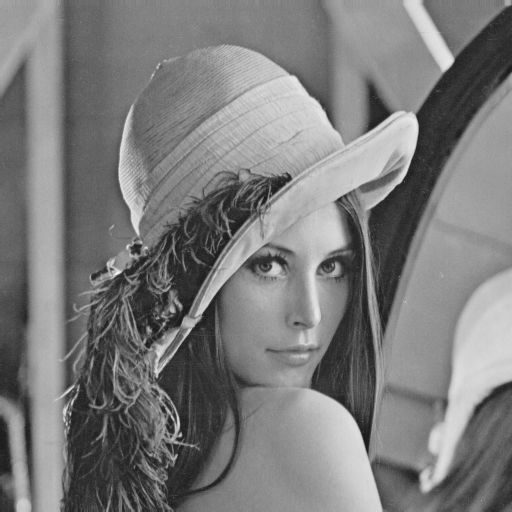

In [19]:
img_g =  img.convert('LA')
img_g

### Part b: Smoothing Filter

In [3]:
from PIL import ImageFilter

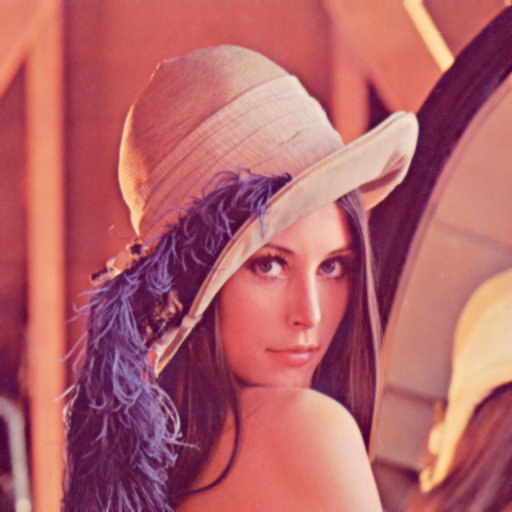

In [5]:
img = img.filter(ImageFilter.SMOOTH_MORE)
imgh

### Part c: Sharpening Filter

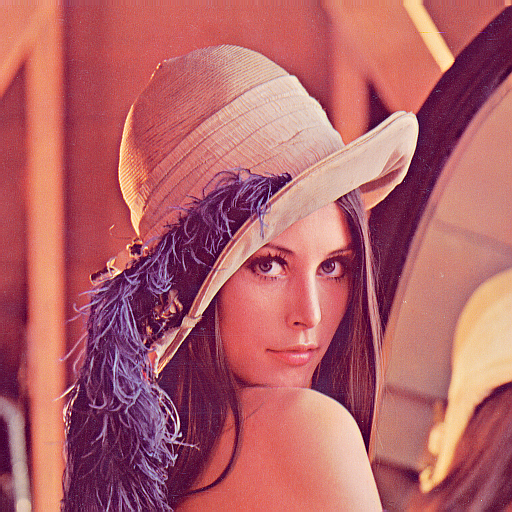

In [22]:
img_sharp = img.filter(ImageFilter.SHARPEN)
img_sharp

### Part d: Grayscale  without Lib

Empty Image

In [23]:
img_np = np.asarray(img)
img_gray = np.empty((img_np.shape[0], img_np.shape[1]))

Weighted channel merge for grayscale

In [24]:
for i in range(img_np.shape[0]):
    for j in range(img_np.shape[1]):
        img_gray[i,j] = int(0.2126*img_np[i,j,0] + 0.7152*img_np[i,j,1] + 0.0722*img_np[i,j,2])

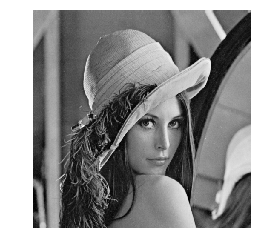

In [25]:
plt.axis('off')
plt.imshow(img_gray, cmap="gray")

Conversion to PIL Image

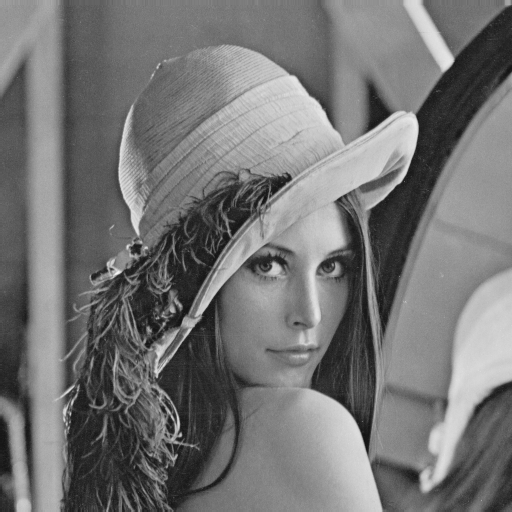

In [26]:
img_gray_pil = Image.fromarray(np.uint8(img_gray))
img_gray_pil

## Home Task

In [30]:
c_intensities = np.zeros(256)
pixels = np.ravel(np.uint8(img_gray))

In [31]:
for intensity in pixels:
    c_intensities[ intensity ] += 1

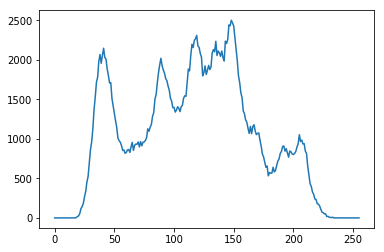

In [32]:
plt.plot(c_intensities)